# Figure S12. Additional summary of genome-wide GWAS-xQTL colocalization results.

- **S12a**. UpSet plot of colocalization events and identified by AD-xQTL ColocBoost.
- **S12b**. Manhattan plot of MaxVCP scores, with labeled genes containing variants with MaxVCP>0.1, and microglia contributions are highlighted in green.
- **S12c**. Excess overlap of genes showing colocalization in microglia with three microglia specific gene-sets as benchmarks.

Error bars denote 95% confidence intervals.

## Figure S12a
UpSet plot of colocalization events and identified by AD-xQTL ColocBoost.

In [1]:
res = readRDS("../../Main_Figures/Figure_6/data/Figure_6e.rds")
all_pheno <- c("Mic","Ast","Oli","OPC","Exc","Inh", "DLPFC", "AC", "PCC", "Monocyte",
               "pQTL", "AC_productive", "AC_unproductive", "DLPFC_productive", "DLPFC_unproductive", 
               "PCC_productive", "PCC_unproductive", "ADGWAS")
coloc_pheno <- lapply(res$colocalized_phenotypes, function(cp) unlist(strsplit(cp, "; ")) )
coloc <- lapply(all_pheno, function(ap){
  pos <- sapply(coloc_pheno, function(cp) ap %in% cp )
  which(pos)
})
names(coloc) <- all_pheno
names(coloc) <- c("Mic (DLPFC)", "Ast (DLPFC)", "Oli (DLPFC)", "OPC (DLPFC)", "Exc (DLPFC)", "Inh (DLPFC)",
                  "eQTL (DLPFC)", "eQTL (AC)", "eQTL (PCC)", "eQTL (Monocyte)","pQTL (DLPFC)", 
                  "p-sQTL (AC)", "u-sQTL (AC)", "p-sQTL (DLPFC)", "u-sQTL (DLPFC)", "p-sQTL (PCC)", "u-sQTL (PCC)",
                  "AD GWAS")
set_sizes <- sapply(coloc, length) # Calculate sizes of each set
ordered_sets <- names(sort(set_sizes, decreasing = FALSE)) # Order by descending size
ordered_sets <- c(ordered_sets[c(1,2,3,5,6,10)], ordered_sets[7], ordered_sets[c(4,8,9,11:18)])　
max_size <- max(sapply(coloc, length))
library("UpSetR")
p1 <- upset(fromList(coloc), 
            order.by = "freq", 
            keep.order = T,
            main.bar.color = "steelblue3", 
            sets.bar.color = "sandybrown", 
            text.scale = c(4,3,5,3,3,0), # Adjust font sizes for the main title, set names, set sizes, intersection sizes, and axis titles
            matrix.color = "black", # Adjust the color of matrix dots
            number.angles = 0, # Adjust the angle of number labels, useful for some plots
            mb.ratio = c(0.5, 0.5), # Adjust the ratio of main bar and sets bar
            point.size = 4, line.size = 1.5,
            sets = ordered_sets,
            # sets = c("AD GWAS", "Mic (DLPFC)", "Ast (DLPFC)", "Oli (DLPFC)", "OPC (DLPFC)", "Exc (DLPFC)", "Inh (DLPFC)",
            #          "eQTL (DLPFC)", "eQTL (AC)", "eQTL (PCC)", "eQTL (Monocyte)",
            #          "p-sQTL (DLPFC)", "u-sQTL (DLPFC)", "p-sQTL (AC)", "u-sQTL (AC)", "p-sQTL (PCC)", "u-sQTL (PCC)",
            #          "pQTL (DLPFC)"),  
            nsets = length(coloc),
            set_size.show = TRUE,
            set_size.angles = 0,
            set_size.numbers_size = 7,
            set_size.scale_max = max_size + 0.15*max_size,
            nintersects = 100,
            mainbar.y.label = "Number of 95% CoS for\n each configuration",
            sets.x.label = NULL)

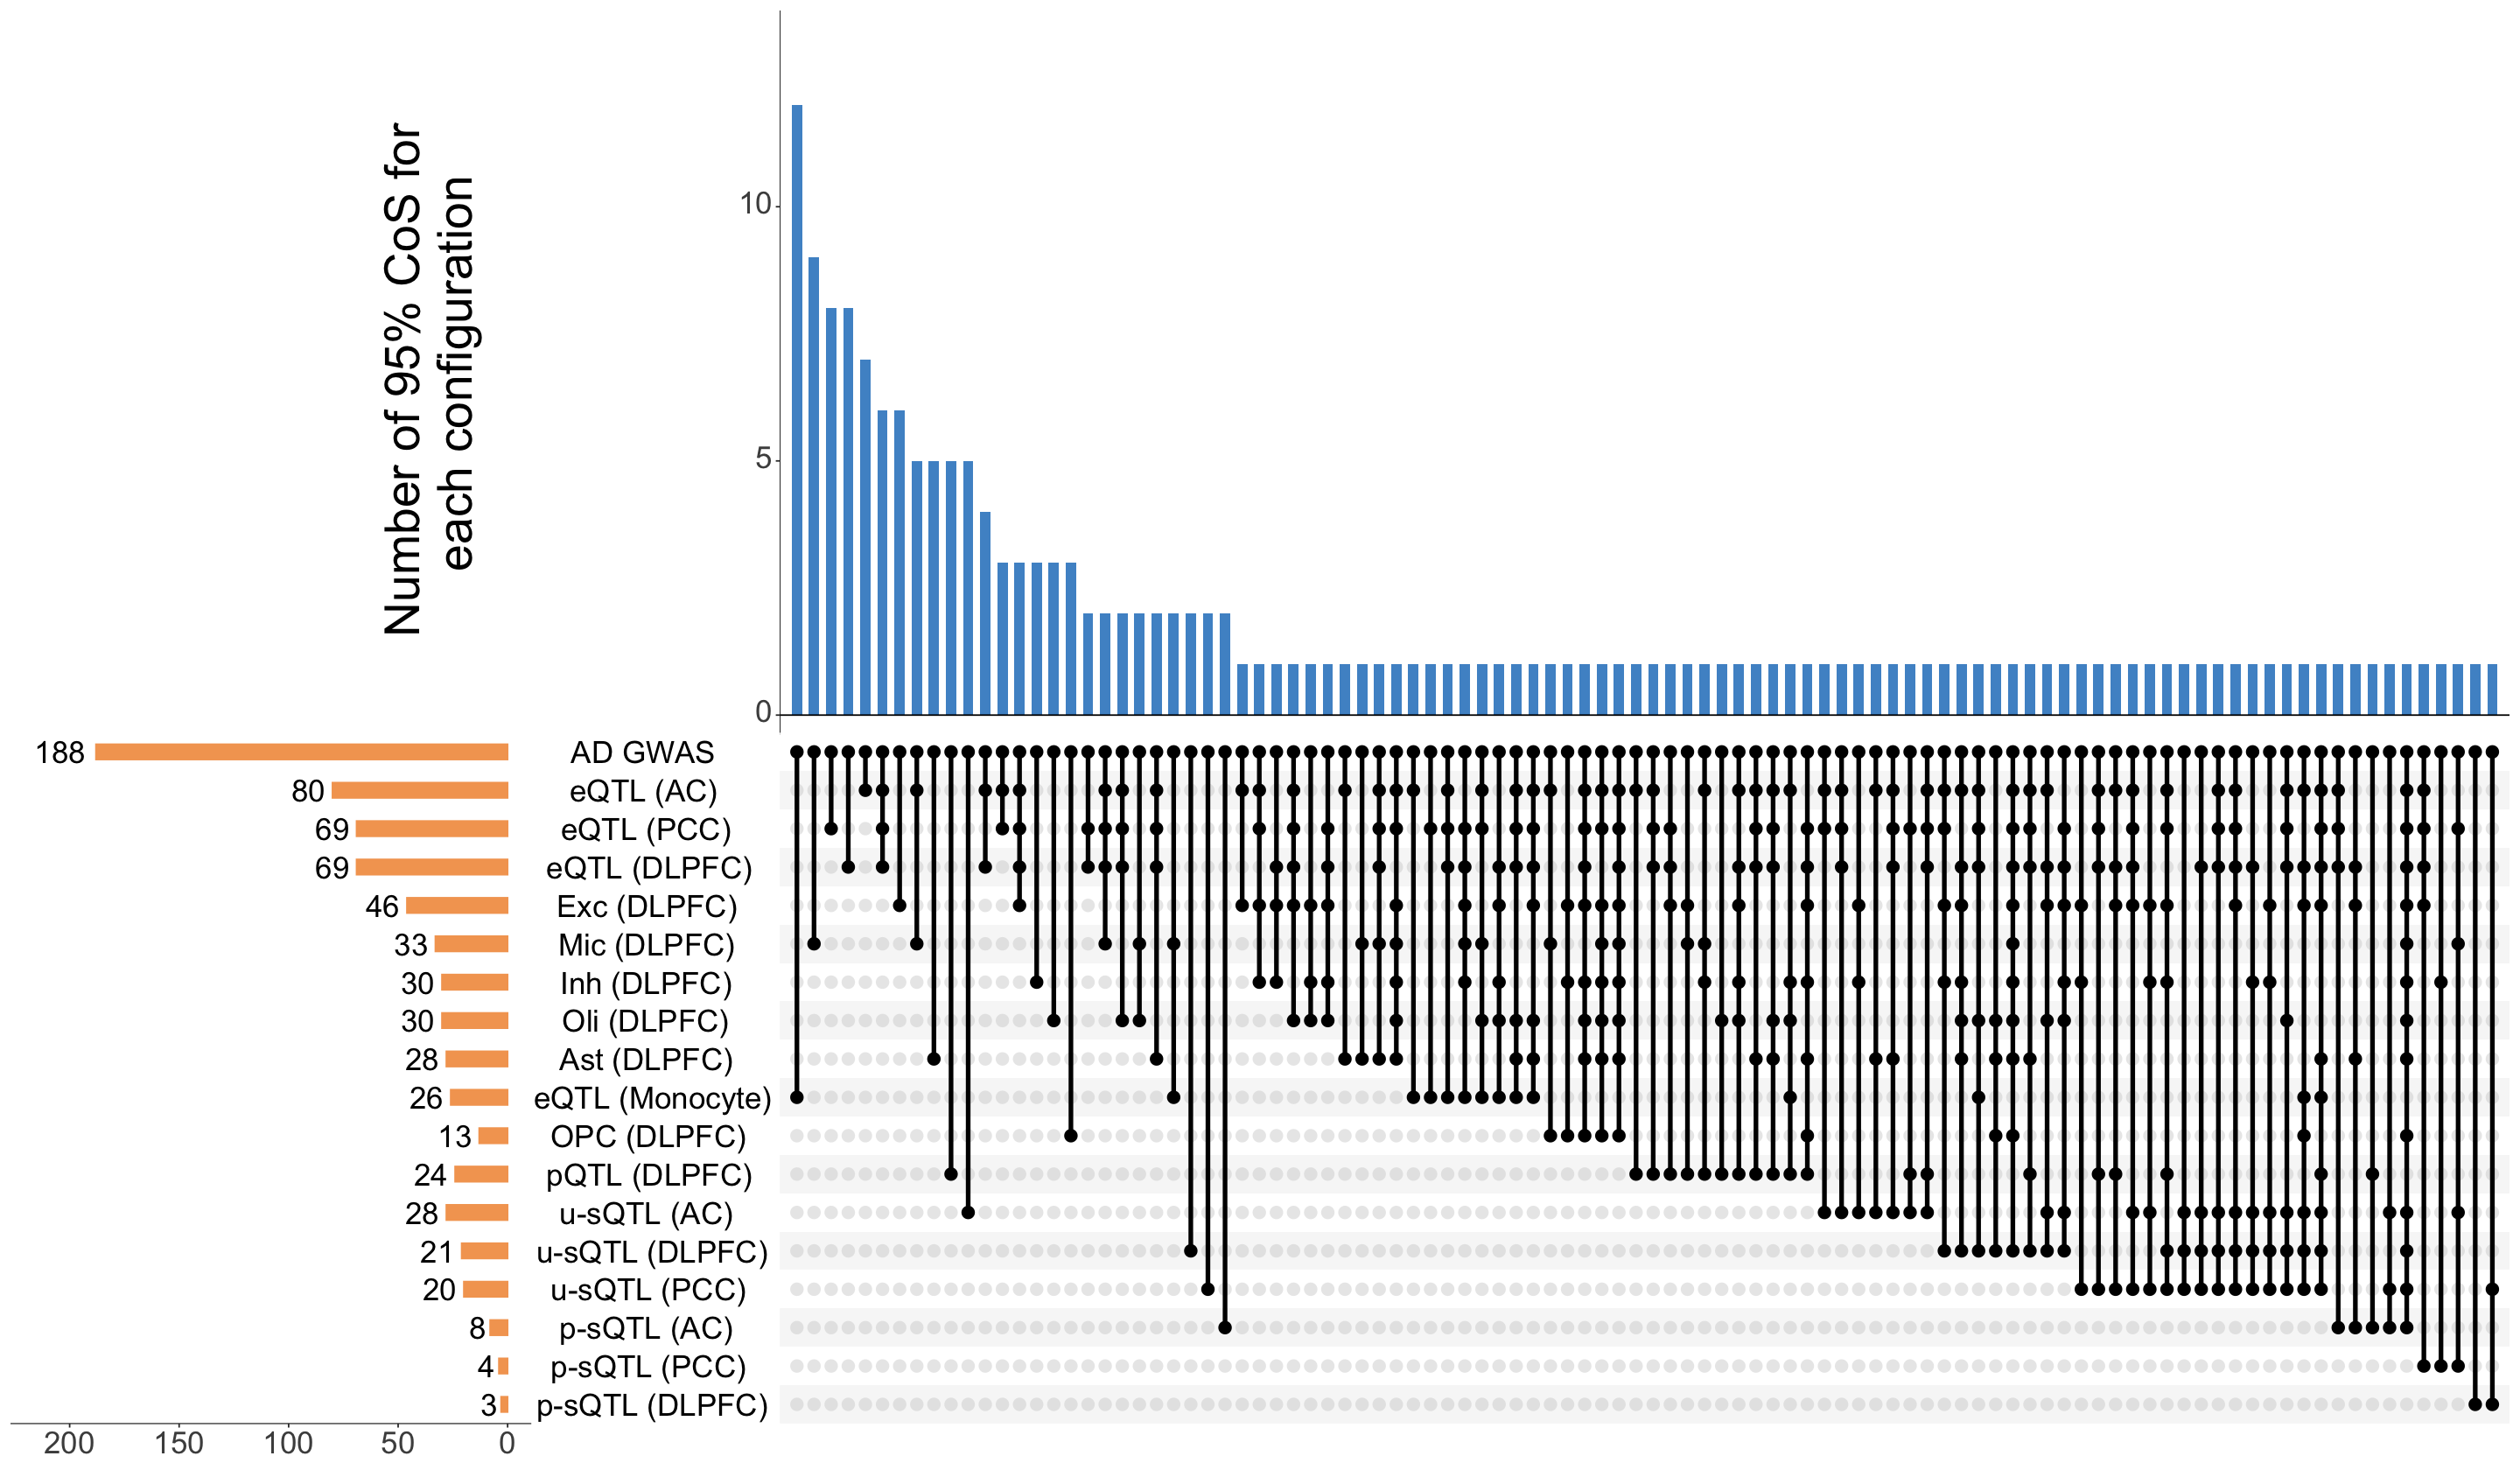

In [3]:
options(repr.plot.width = 24, repr.plot.height = 14)
p1

## Figure S12b
Manhattan plot of MaxVCP scores, with labeled genes containing variants with MaxVCP>0.1, and microglia contributions are highlighted in green.

Note: we only include the information for the colocalized variants in 95% CoS from both ColocBoost and COLOC for this reproducable purpose.

In [4]:
data <- readRDS("Figure_S12b.rds")
don <- data$don
axisdf <- data$axisdf
anno_info <- data$anno_info
library(ggplot2)
library(ggrepel)
p1 <- ggplot(don, aes(x=BPcum, y=VCP)) +
  
  # Show all points
  geom_point( aes(color=as.factor(CHR)), alpha=0.8, size=1.6) +
  scale_color_manual(values = rep(c("#2166AC", "#92C5DE"), 22 )) +
  geom_hline(yintercept = 0.5, linetype = "dashed", color = "red", linewidth = 1) +
  # annotate("text", x = 600000, y = 0.53, label = "maxVCP=0.5", color = "red", size = 5, hjust = 1) +
  
  # custom X axis:
  scale_x_continuous( label = axisdf$CHR, breaks= axisdf$center ) +
  scale_y_continuous(expand = c(0, 0) ) +     # remove space between plot area and x axis
  
  labs(title = "",  x = "", y = "maxVCP", fill = "") +
  ylim(0, 1.02) +
  
  # Add highlighted points
  geom_point(data=subset(don, VCP>=0.5), color="orange", size=2) +
  
  # Add label using ggrepel to avoid overlapping
  geom_label_repel(data = anno_info, aes(label = Gene, fill = micgroup), 
                   size = 5, force = 20, force_pull = 0.5, 
                   box.padding = 0.5, max.overlaps = 40, color = "black") +
  scale_fill_manual(values = c("FALSE" = scales::alpha("#F39B7F", 0.5), "TRUE" = scales::alpha("#79AF97FF", 0.5)) ) +
  theme_minimal(base_size = 15) +
  theme( 
    axis.text.x = element_text(size = 22, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 22),
    axis.title.y = element_text(size = 28),
    legend.position="none",
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5)
  ) 

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


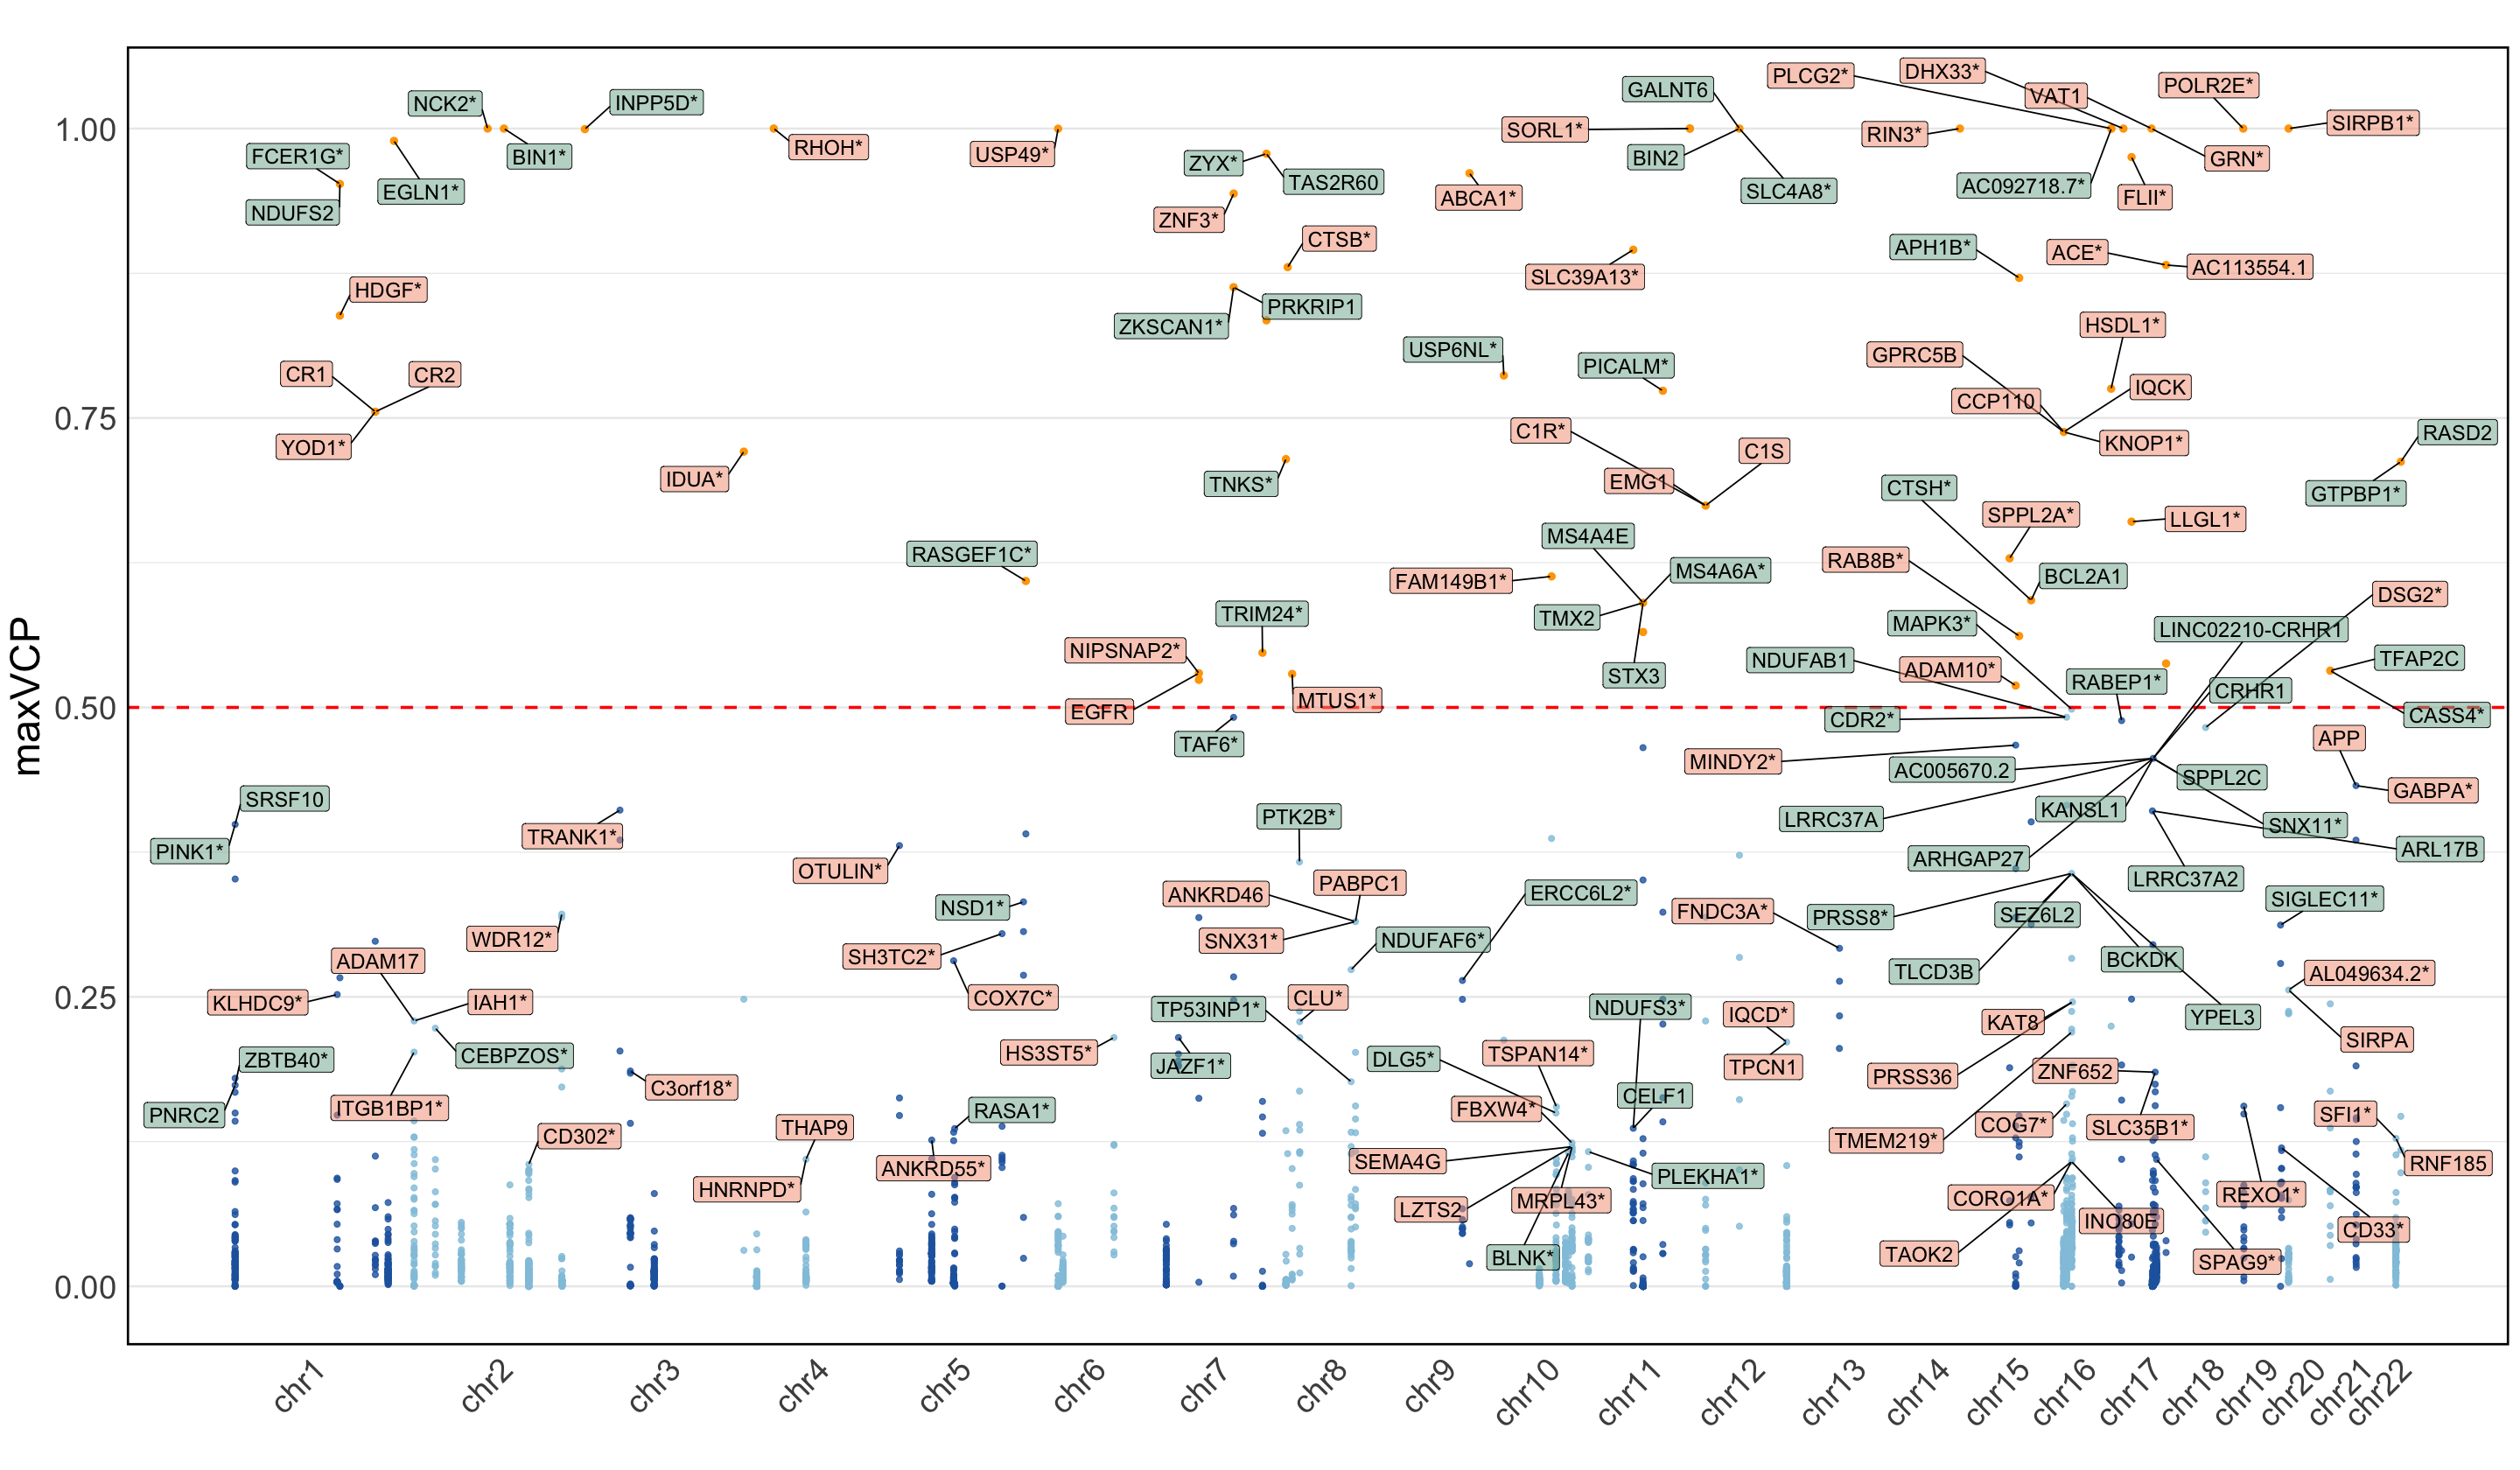

In [6]:
options(repr.plot.width = 24, repr.plot.height = 14)
p1

## Figure S12c
Excess overlap of genes showing colocalization in microglia with three microglia specific gene-sets as benchmarks.

In [10]:
library(tidyverse)
data <- readRDS("Figure_S12c.rds")
library(ggsci)
sd_multiplier <- 1.96
p <- ggplot(data, aes(x = geneList, y = Enrichment, fill = geneList)) +
  geom_bar(stat = "identity", width = 0.7, position = position_dodge(width = 0.9)) +
  geom_errorbar(aes(ymin = Enrichment - sd_multiplier * SD, ymax = Enrichment + sd_multiplier * SD), 
                width = 0.2, position = position_dodge(width = 0.9)) +
  scale_color_npg() +
  geom_hline(yintercept = 0.98, linetype = "dashed", color = "grey20", linewidth = 1) +
  geom_text(data = data %>% filter(P<0.05/3), 
            aes(y = Enrichment + sd_multiplier*SD + 0.1, label = "*"), size = 10, color = "#F94144") +
  labs(
    title = "",
    x = "",
    y = "Excess overlap"
  ) +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text(size = 0, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 0),
    axis.title.y = element_text(size = 28),
    axis.text.y = element_text(size = 22, margin = margin(r = 0), angle = 90, hjust = 0.5, vjust = 0),
    axis.text.x = element_text(size = 20, margin = margin(t = 0)),
    legend.position = "none",
    panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
  )

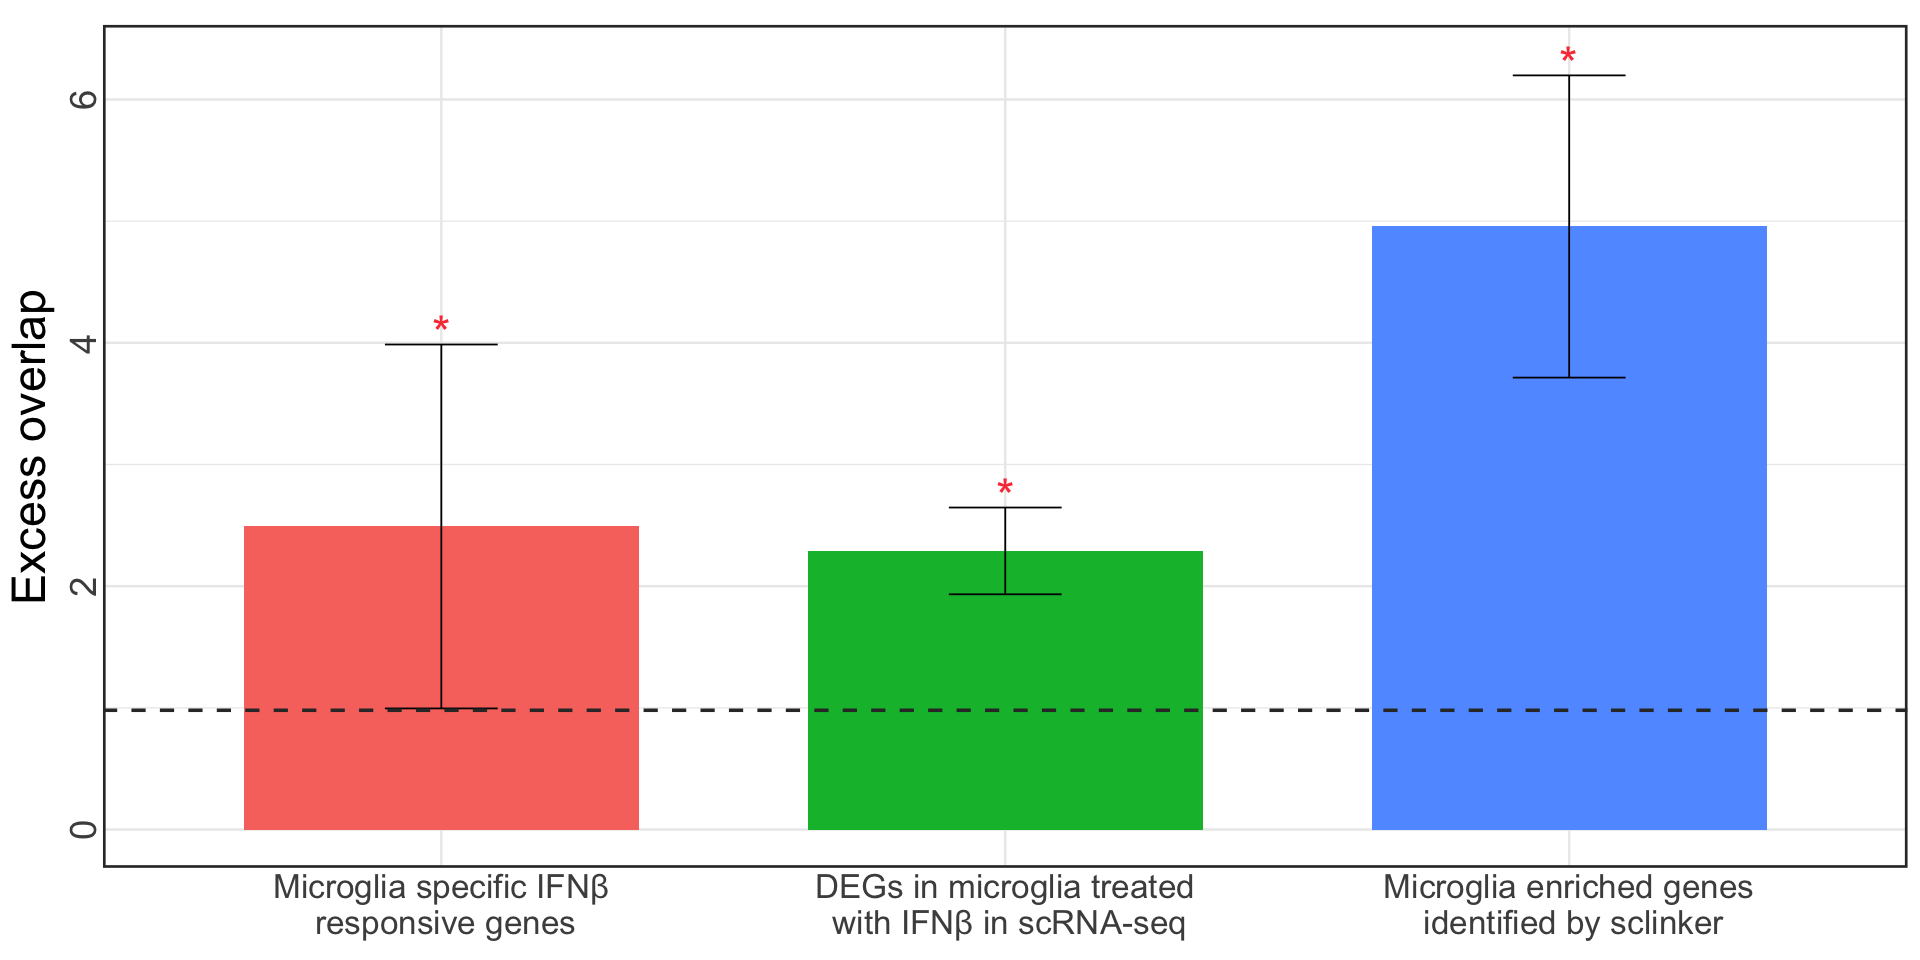

In [11]:
options(repr.plot.width = 16, repr.plot.height = 8)
p